In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# Load the uploaded CSV file to examine its contents

yahoo_stock_data = pd.read_csv('/content/yahoo_stock.csv')



In [ ]:
# Display the first few rows of the dataset to understand its structure
yahoo_stock_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [ ]:
yahoo_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [ ]:
yahoo_stock_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


In [ ]:
yahoo_stock_data.isnull().sum()

,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Adj Close,0


In [ ]:
!pip install matplotlib seaborn

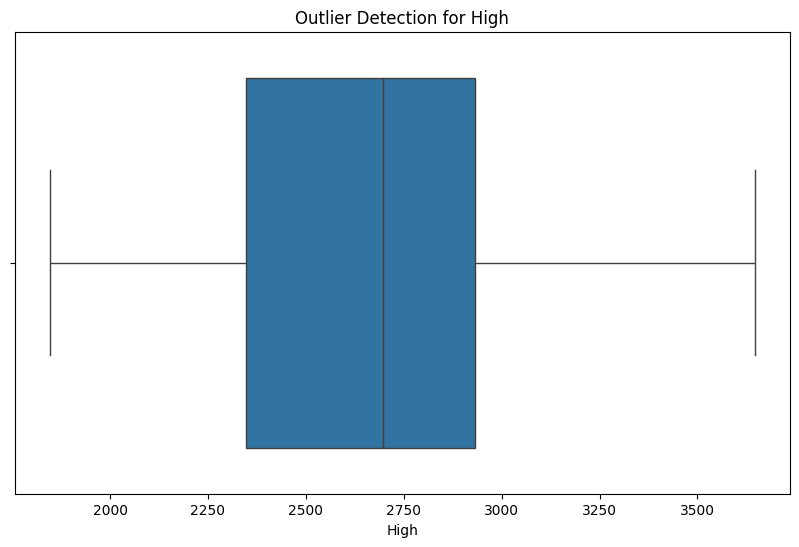

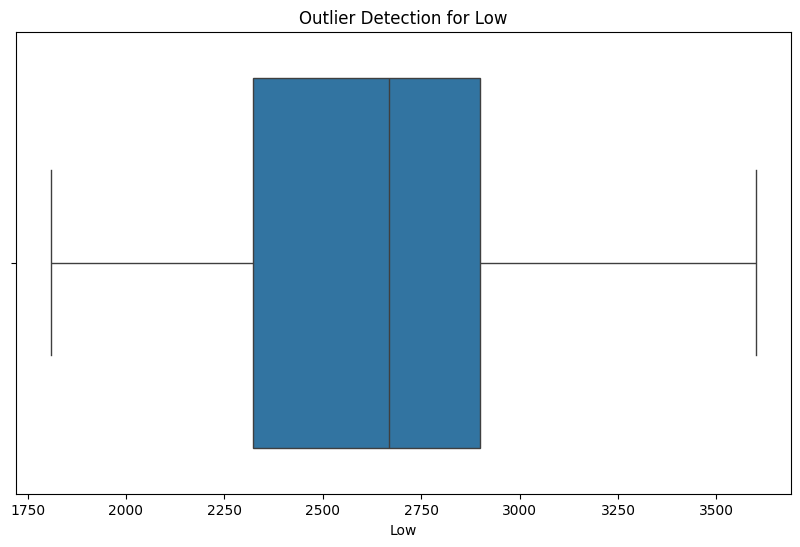

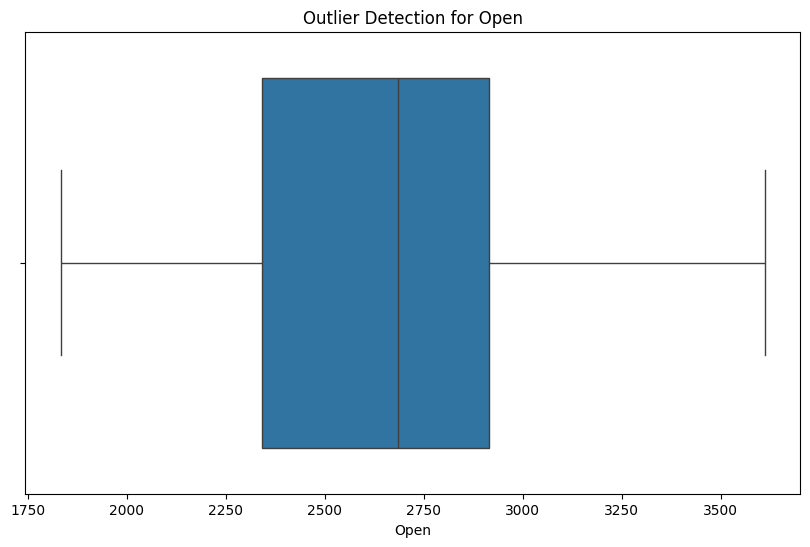

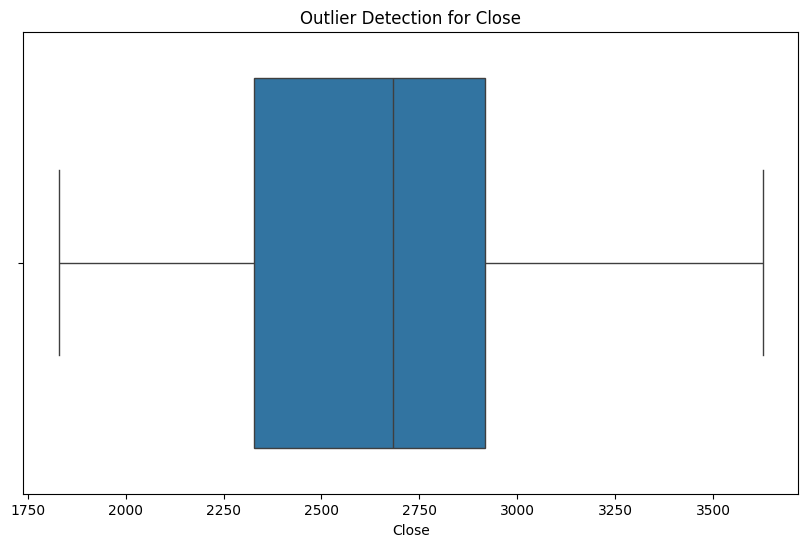

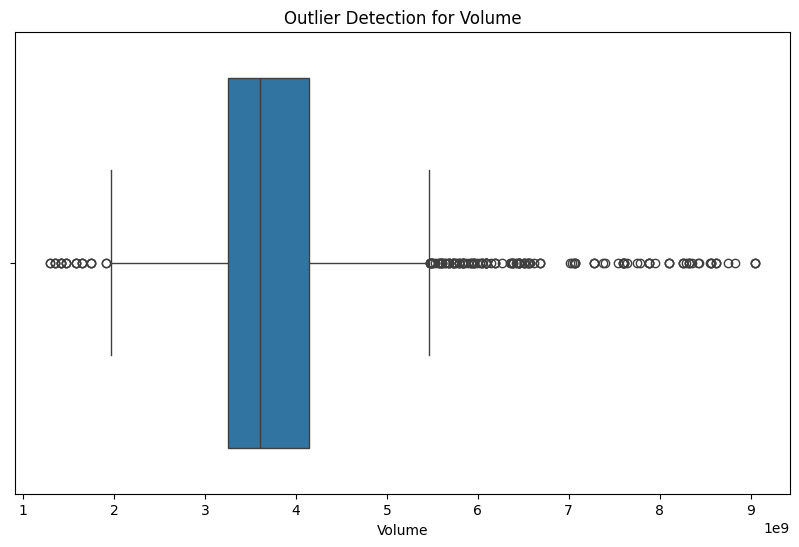

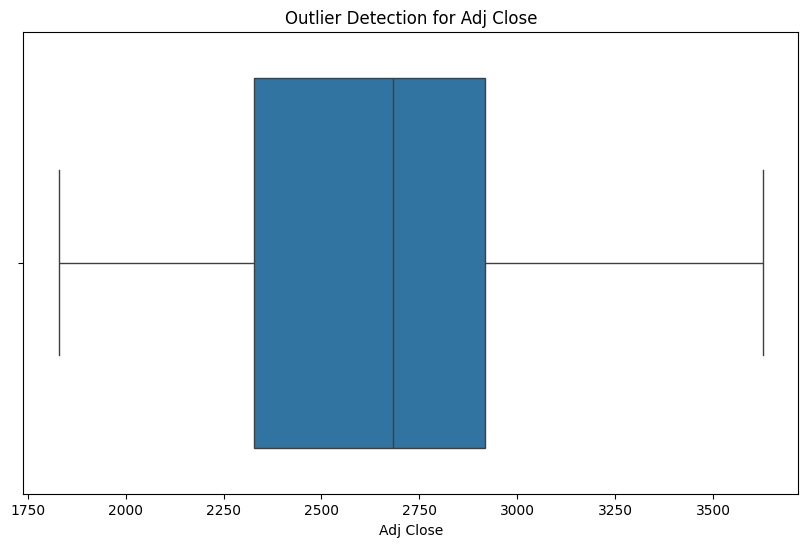

Empty DataFrame
Columns: [Date, High, Low, Open, Close, Volume, Adj Close]
Index: []


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns  # Import seaborn if you're using sns.boxplot



# Create yahoo_stock_data_cleaned from yahoo_stock_data by dropping missing values
yahoo_stock_data_cleaned = yahoo_stock_data.dropna()  # Assign the result to yahoo_stock_data_cleaned

# Outlier detection for numeric columns using boxplots
numeric_columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

# Plotting boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=yahoo_stock_data_cleaned[column]) # Now yahoo_stock_data_cleaned is defined
    plt.title(f'Outlier Detection for {column}')
    plt.xlabel(column)
    plt.show()

# Identifying statistical outliers (using the IQR method) for 'Close' prices
Q1 = yahoo_stock_data['Close'].quantile(0.25)
Q3 = yahoo_stock_data['Close'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering outliers
# Use yahoo_stock_data_cleaned instead of yahoo_stock_data in outlier filtering
outliers_close = yahoo_stock_data_cleaned[
    (yahoo_stock_data_cleaned['Close'] < lower_bound) | (yahoo_stock_data_cleaned['Close'] > upper_bound)
]

# Displaying the outliers to the user

print(outliers_close)

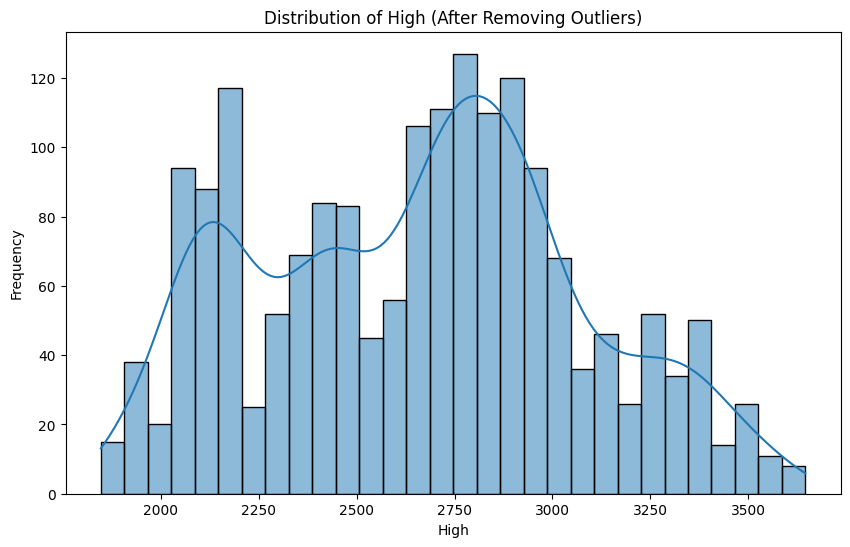

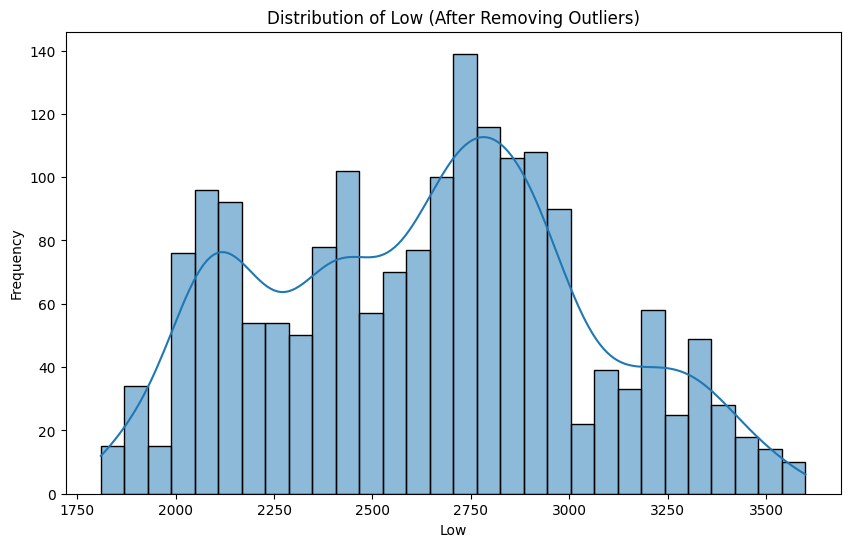

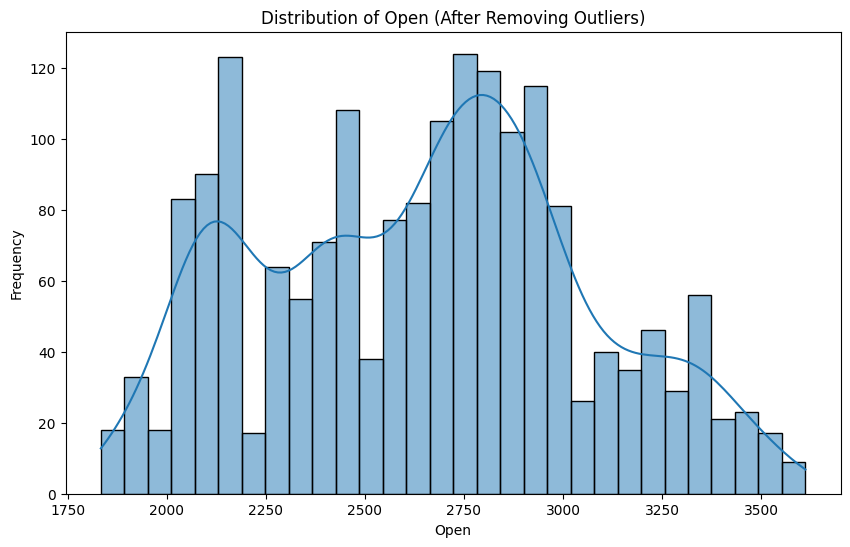

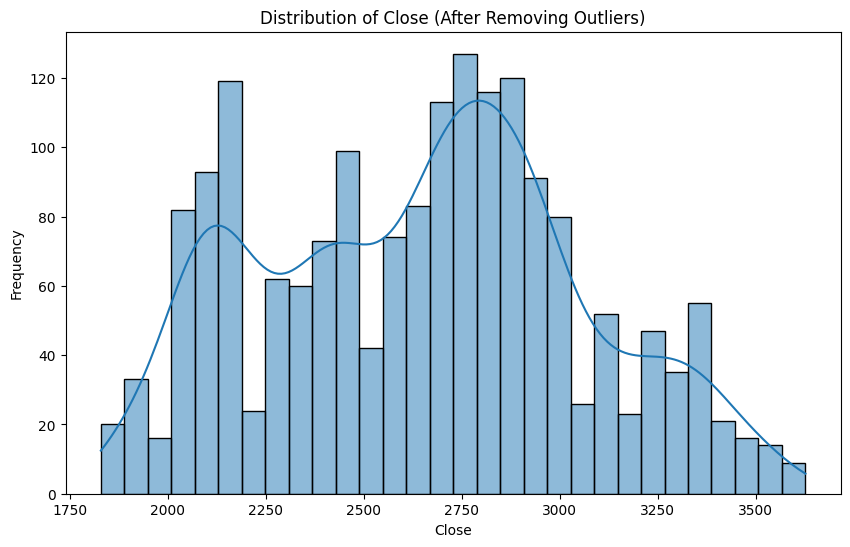

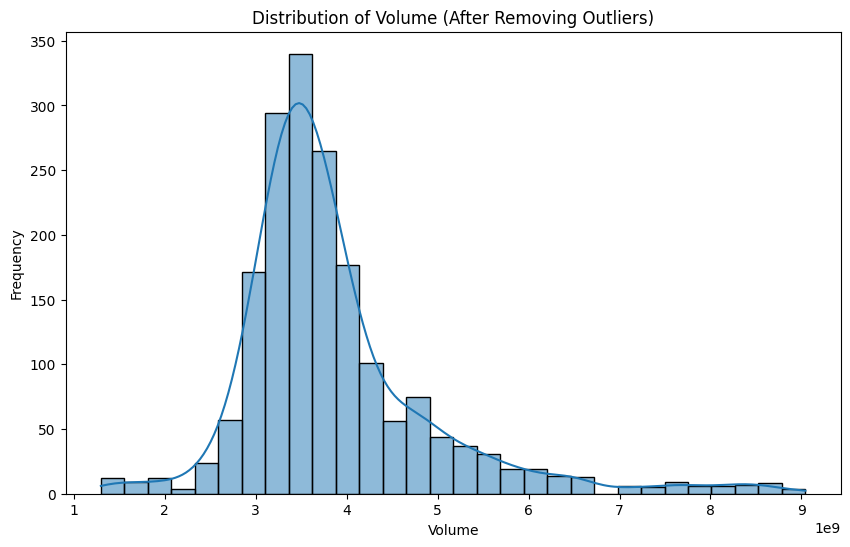

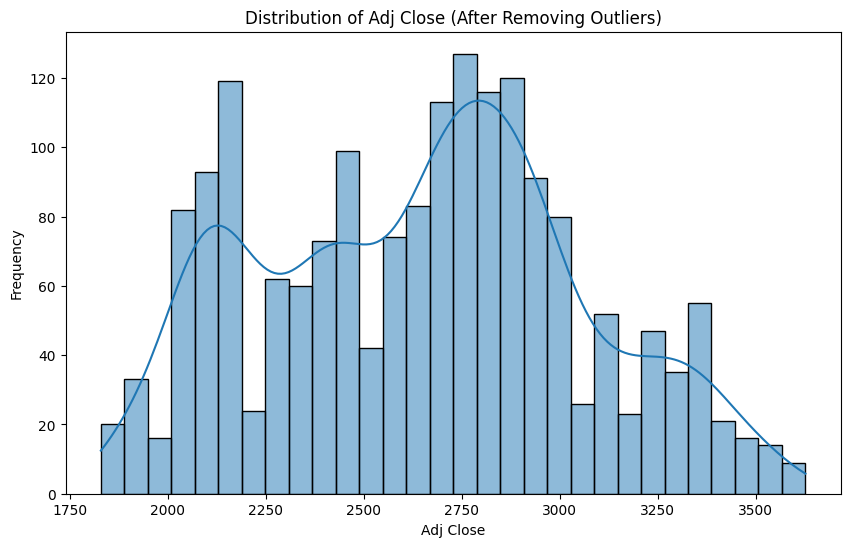

In [ ]:
# Plotting the distributions of the cleaned numeric columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(yahoo_stock_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column} (After Removing Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Correlation Analysis:

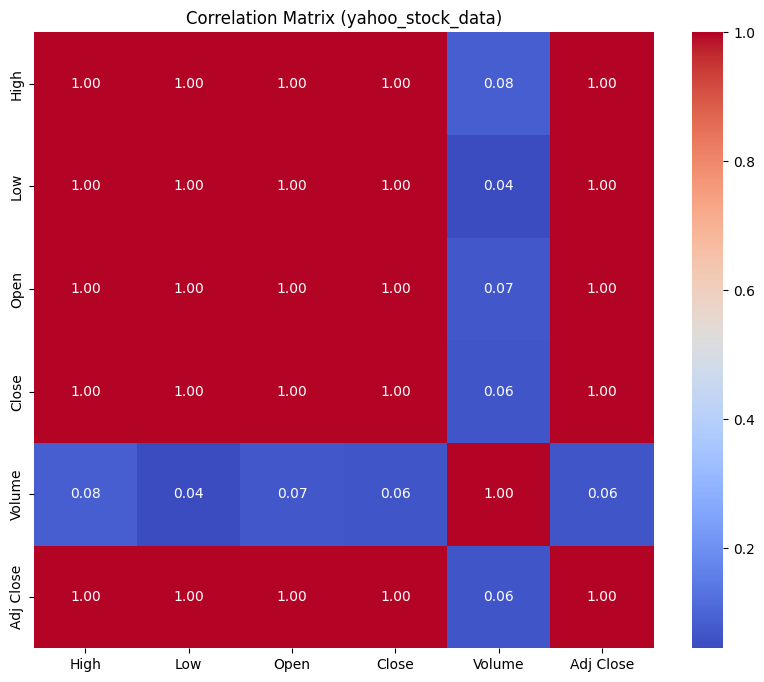

Correlation Matrix of yahoo_stock_data:
               High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.998154  0.999328  0.998958  0.084212   0.998958
Low        0.998154  1.000000  0.998794  0.999020  0.044557   0.999020
Open       0.999328  0.998794  1.000000  0.998344  0.069729   0.998344
Close      0.998958  0.999020  0.998344  1.000000  0.063401   1.000000
Volume     0.084212  0.044557  0.069729  0.063401  1.000000   0.063401
Adj Close  0.998958  0.999020  0.998344  1.000000  0.063401   1.000000


In [ ]:
# Assuming tools.py is in the same directory, import it
try:
    import tools
except ImportError:
    # If tools.py is not found or doesn't define display_dataframe_to_user
    # Provide a fallback display function
    def display_dataframe_to_user(name, dataframe):
        print(f"{name}:\n{dataframe}")
    # Assign this function to 'tools.display_dataframe_to_user'
    # so the original code still works
    tools = type('', (), {'display_dataframe_to_user': display_dataframe_to_user})

# Rest of your code...
# Correlation matrix for the transformed data
# Exclude the 'Date' column from correlation calculation
correlation_matrix = yahoo_stock_data.drop(columns=['Date']).corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (yahoo_stock_data)")
plt.show()

# Displaying the correlation matrix to the user
tools.display_dataframe_to_user(name="Correlation Matrix of yahoo_stock_data", dataframe=correlation_matrix)

The heatmap and correlation matrix provide a clear understanding of how variables are related.

Key Points in the Heatmap

Color Coding:

Dark red squares indicate strong positive correlations (close to 1).
Blue squares represent weak or no correlation (close to 0).

Diagonal Elements:

The diagonal values are all 1.00 (dark red) because each variable is perfectly correlated with itself.

Strong Correlations:

High, Low, Open, Close, and Adj Close:

Correlation values > 0.99 indicate almost perfect positive relationships between these variables.

Weak Correlations:

Volume vs Price Variables:

Volume and High: 0.084212.
Volume and Close: 0.063401.

Trading volume does not strongly affect daily price movements in this dataset.
This suggests that price changes may be driven more by external factors (e.g., news, market sentiment) rather than sheer trading activity.While price-related variables are highly interdependent, Volume shows weak influence.

While price-related variables are highly interdependent, Volume shows weak influence.



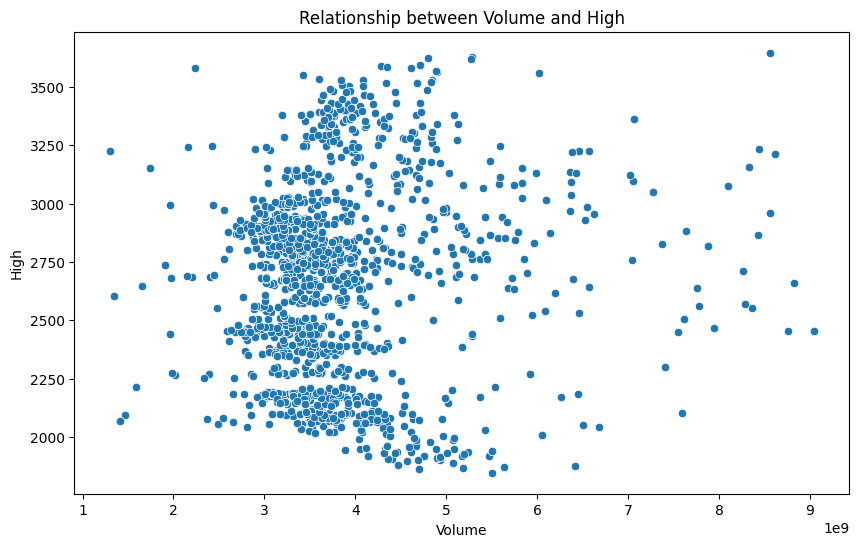

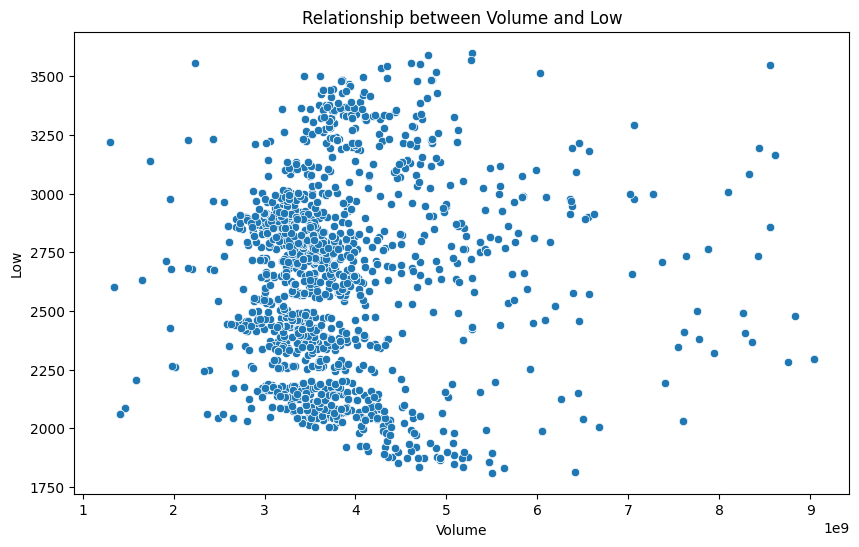

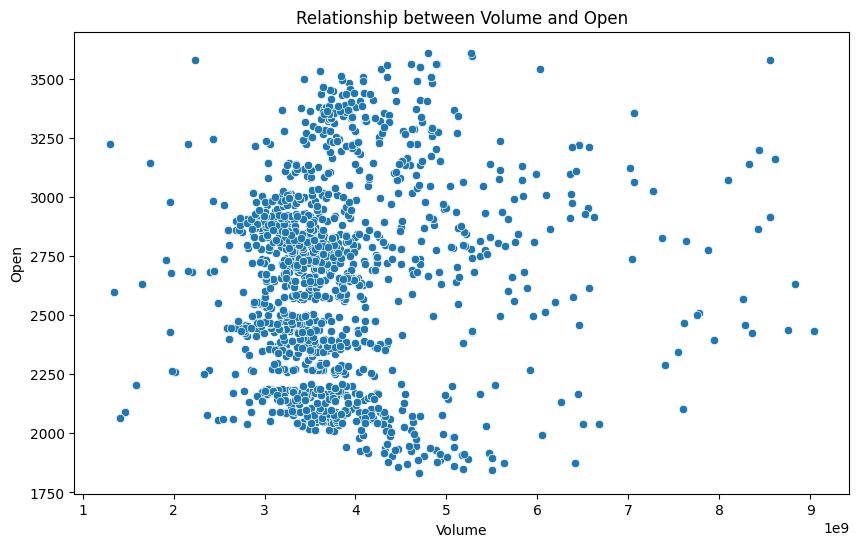

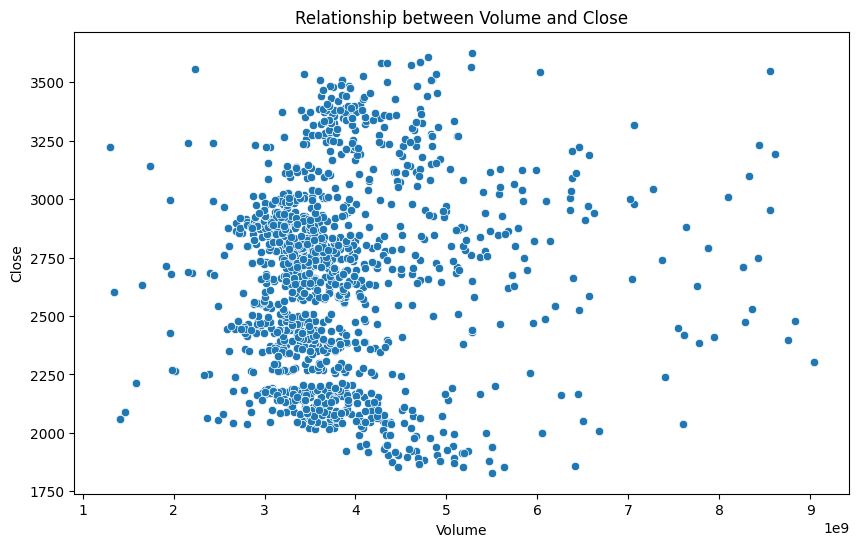

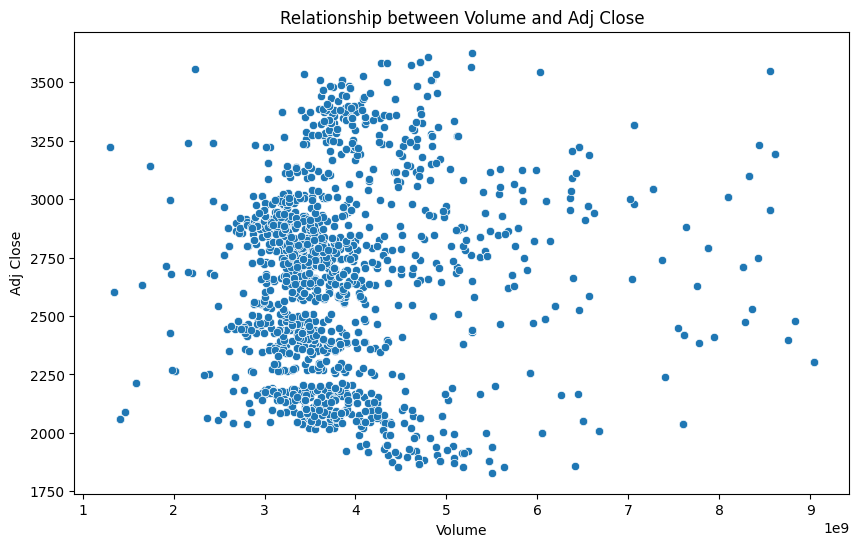

In [ ]:
# Scatter plots between Volume and price variables
for column in ['High', 'Low', 'Open', 'Close', 'Adj Close']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=yahoo_stock_data['Volume'], y=yahoo_stock_data[column])
    plt.title(f'Relationship between Volume and {column}')
    plt.xlabel('Volume')
    plt.ylabel(column)
    plt.show()

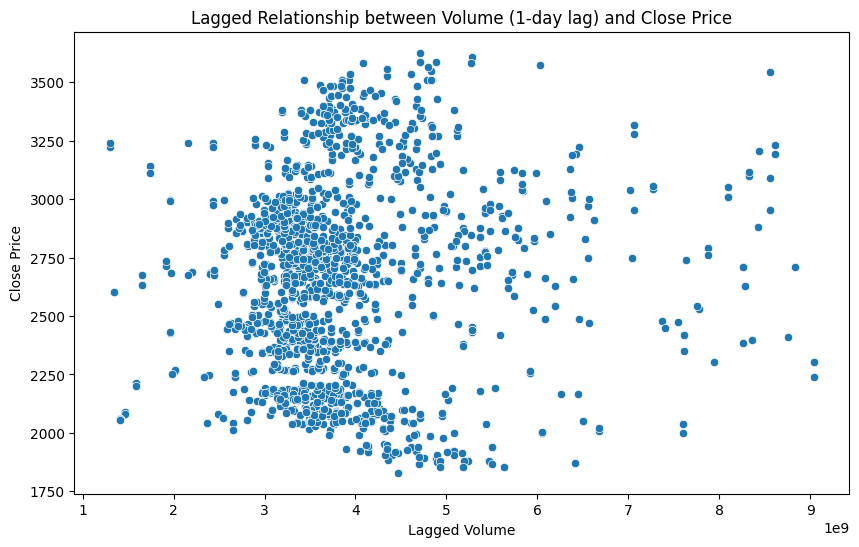

In [ ]:
# Adding a lagged Volume column to explore lagged relationships with Close price
yahoo_stock_data['Lagged_Volume'] = yahoo_stock_data['Volume'].shift(1)
lagged_correlation = yahoo_stock_data[['Lagged_Volume', 'Close']].corr()

# Visualizing the lagged relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=yahoo_stock_data['Lagged_Volume'], y=yahoo_stock_data['Close'])
plt.title('Lagged Relationship between Volume (1-day lag) and Close Price')
plt.xlabel('Lagged Volume')
plt.ylabel('Close Price')
plt.show()



This scatter plot confirms a weak relationship between Volume and the  price.The weak relationship suggests that trading volume does not strongly influence the price chenges
External factors such as market sentiment, macroeconomic trends, or specific stock-related news might have a larger impact on the daily price.


# Advanced analysis

Time Series Analysis

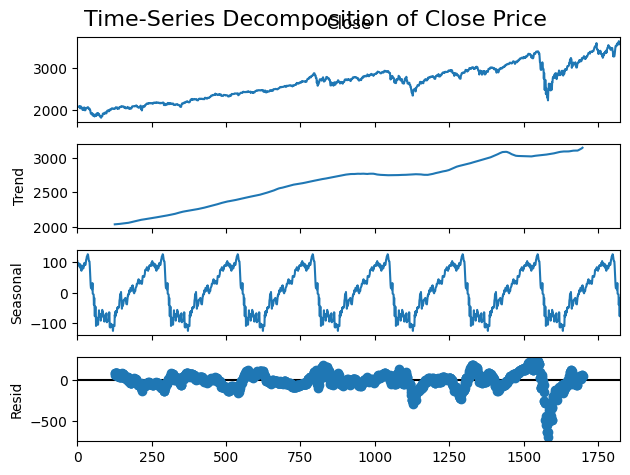

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Time-series decomposition of the Close price (repeated for step emphasis)
decompose_result = seasonal_decompose(yahoo_stock_data['Close'], model='additive', period=252)  # Assuming 252 trading days/year

# Plot the decomposed components
decompose_result.plot()
plt.suptitle('Time-Series Decomposition of Close Price', fontsize=16)
plt.show()




This visual represents a time-series decomposition of the Close price, breaking it down into its observed, trend, seasonal, and residual components.

Observed Component

Description:

The observed data shows the original Close price time series over the entire time frame (1,825 days).
It includes all patterns: long-term trends, seasonal variations, and random fluctuations.

Key Insights:

A steady upward trend is visible, indicating an overall growth in the stock price.
Sharp dips (e.g., around day 1,500) correspond to market downturns. While index Range is : 2,000 to 3,500

Trend Component

Description:

The trend represents the long-term direction of the Close price, smoothed by removing short-term variations.


Key Insights:

A consistent upward trend is visible, reflecting long-term price growth.
A temporary flattening or slight decline occurs around day 1,500, indicating a possible market correction or downturn

Statistics:

Positive slope: Suggests overall growth in stock value over time.
Smoothing: Eliminates short-term noise, focusing on macro-level changes.

Seasonal Component

Description:

The seasonal component highlights repeating patterns or cyclical behavior over a fixed period (e.g., yearly or quarterly).

Key Insights:

Cyclical patterns are observed, with peaks and troughs repeating at regular intervals.
This indicates the presence of predictable, recurring behaviors, possibly linked to yearly economic cycles or market trends.

Statistics:

Amplitude: Seasonal variations range between +100 and -100.
Periodicity: Matches expected trading cycles (e.g., annual fluctuations in the stock market).

Residual Component

Description:

The residuals capture random, unexplained variations after removing the trend and seasonal components.

Key Insights:

Residuals show higher volatility during specific periods, such as around day 1,500 (likely a market disruption event).
Most residuals are centered around zero, indicating the decomposition effectively isolates trend and seasonality.

Conclusion

Trend: Long-term growth is evident, with occasional corrections.

Seasonality: Predictable cycles suggest recurring market behavior.

Residuals: Highlight anomalies or market disruptions.








Future Engineering

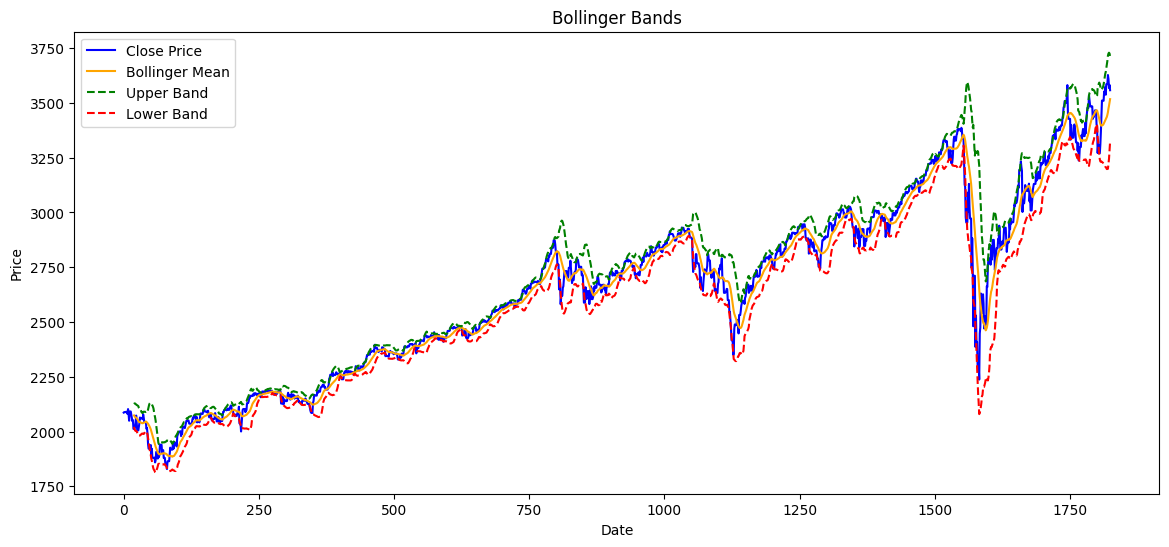

In [ ]:
# Feature engineering: Adding advanced technical indicators

# Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

yahoo_stock_data['RSI'] = calculate_rsi(yahoo_stock_data['Close'])

# Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    upper_band = rolling_mean + (2 * rolling_std)
    lower_band = rolling_mean - (2 * rolling_std)
    return rolling_mean, upper_band, lower_band

yahoo_stock_data['Bollinger_Mean'], yahoo_stock_data['Bollinger_Upper'], yahoo_stock_data['Bollinger_Lower'] = calculate_bollinger_bands(yahoo_stock_data['Close'])

# Visualize the Bollinger Bands with Close Price
plt.figure(figsize=(14, 6))
plt.plot(yahoo_stock_data.index, yahoo_stock_data['Close'], label='Close Price', color='blue')
plt.plot(yahoo_stock_data.index, yahoo_stock_data['Bollinger_Mean'], label='Bollinger Mean', color='orange')
plt.plot(yahoo_stock_data.index, yahoo_stock_data['Bollinger_Upper'], label='Upper Band', color='green', linestyle='--')
plt.plot(yahoo_stock_data.index, yahoo_stock_data['Bollinger_Lower'], label='Lower Band', color='red', linestyle='--')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



This visual represents the Bollinger Bands for the stock's Close Price, providing insights into price volatility and potential trading signals.

Components of the Plot

Close Price (Blue Line):

Represents the actual closing price of the stock for each day in the dataset.
This line fluctuates within the Bollinger Bands, reflecting daily price movements.

Bollinger Mean (Orange Line):

A 20-day moving average of the Close price.
Smooths out short-term fluctuations, highlighting the overall price trend.

Upper Band (Green Dashed Line):

The upper limit is calculated as:
Bollinger Mean + 2 × Standard Deviation of Closing Prices (20-day window).
Represents a potential resistance level where the price may reverse or consolidate.

Lower Band (Red Dashed Line):

The lower limit is calculated as:
Bollinger Mean - 2 × Standard Deviation of Closing Prices (20-day window).
Represents a potential support level where the price may bounce back.

Key Observations


Price within Bands:

Most of the Close price values remain within the upper and lower bands.
Prices occasionally breach the bands, signaling periods of extreme volatility or potential trading opportunities.

Volatility:

Wider bands (e.g., around day 1,500) indicate higher volatility.
Narrower bands indicate low volatility and price stability.

Trend Alignment:

The Bollinger Mean follows the general trend of the Close price, confirming its utility as a central price tendency.





Clustering and Segmentation:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns



In [ ]:
# Selecting features for clustering
clustering_features = ['Volume', 'Close']  # Only include existing columns
clustering_data = yahoo_stock_data[clustering_features].dropna()


# Example for calculating a 7-day moving average:
yahoo_stock_data['7-Day MA'] = yahoo_stock_data['Close'].rolling(window=7).mean()



In [ ]:
# Standardizing the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [ ]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)



In [ ]:
# Adding cluster labels to the dataset
clustering_data['Cluster'] = clusters

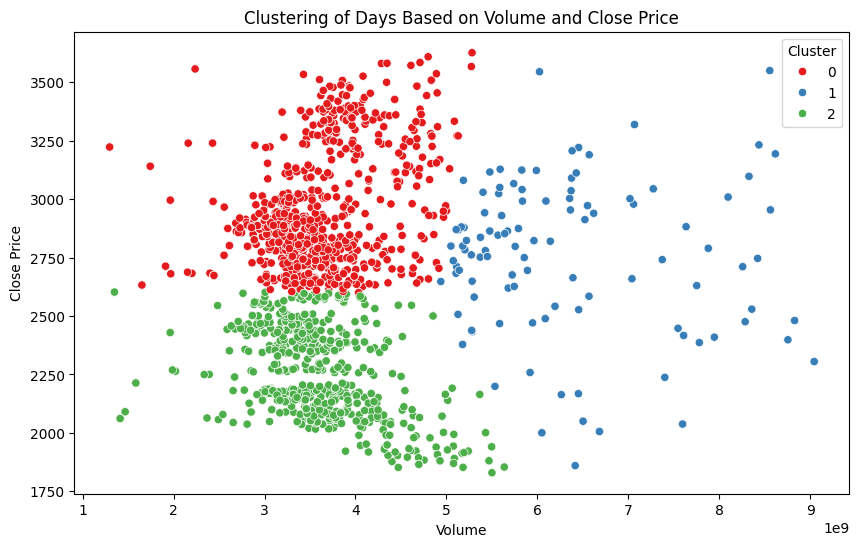

In [ ]:
# Visualizing the clusters (using first two principal features for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustering_data['Volume'], y=clustering_data['Close'], hue=clustering_data['Cluster'], palette='Set1')
plt.title('Clustering of Days Based on Volume and Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.legend(title='Cluster')
plt.show()

This scatter plot represents the clustering of days based on Volume (x-axis) and Close Price (y-axis). The data points are grouped into three clusters, labeled as 0, 1, and 2, and distinguished by colors (red, blue, and green).

Cluster 0 (Red)

Position: Centered in the mid-range for both Volume and Close Price

Characteristics:
Days with moderate trading volumes (~3 to 5 billion).
Close prices predominantly in the range of 2,750 to 3,200.

Interpretation:

Represents "typical trading days" with stable prices and moderate trading activity.

Cluster 1 (Blue)

Position: High trading volumes and high Close Prices

Characteristics:

Days with very high volumes (above 6 billion) and Close Prices above 3,000.

Interpretation

Corresponds to days of heightened market activity, possibly driven by significant events or bullish sentiment.

Cluster 2 (Green)

Position: Low Close Prices and low trading volumes.

Characteristics

Days with Volume below ~3 billion and Close Prices between 2,000 and 2,500.

Interpretation

eflects quieter trading days with low price levels, potentially during bearish phases or periods of low market interest.

Statistical Insights

Cluster 0 (red) is the largest, indicating most trading days fall into this "moderate" category.

Cluster 1 (blue) has the fewest data points, suggesting extreme trading days are less common.

Correlation Between Volume and Close Price

While clustering reveals patterns, the overall correlation between Volume and Close Price remains weak (~0.06 from earlier analysis).




 Volatility and Risk Analysis:


In [ ]:
# Calculating daily returns and rolling volatility
yahoo_stock_data['Daily Return'] = yahoo_stock_data['Close'].pct_change()
yahoo_stock_data['Rolling Volatility (7-Day)'] = yahoo_stock_data['Daily Return'].rolling(window=7).std()
yahoo_stock_data['Rolling Volatility (30-Day)'] = yahoo_stock_data['Daily Return'].rolling(window=30).std()



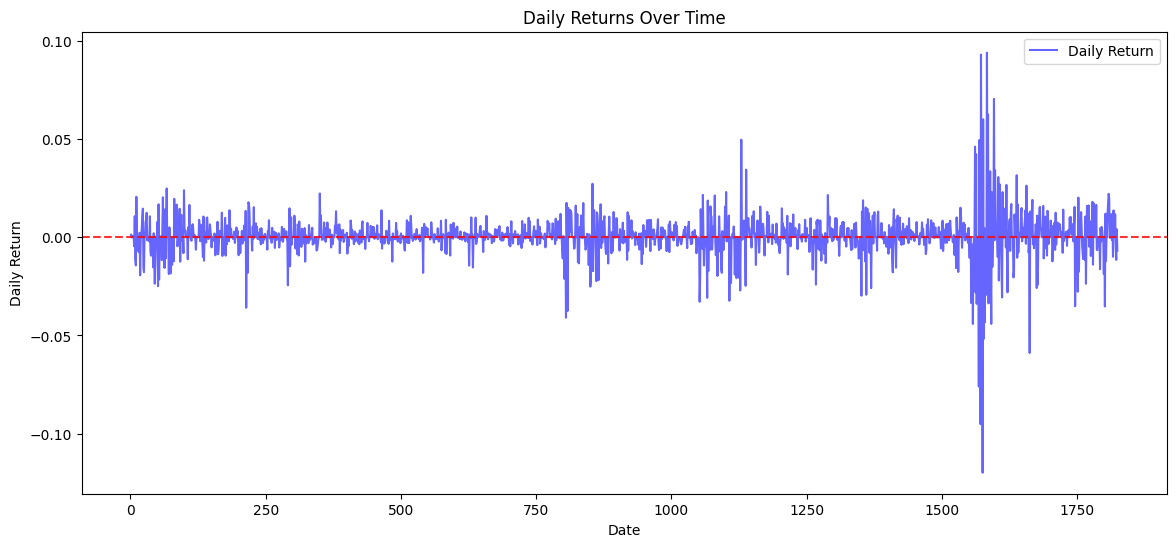

In [ ]:
# Plotting daily returns over time
plt.figure(figsize=(14, 6))
plt.plot(yahoo_stock_data.index, yahoo_stock_data['Daily Return'], label='Daily Return', color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', alpha=0.8)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

The visual you shared appears to be a line chart showing daily stock returns over time
Key Components of the Chart:
1. Daily Returns (Blue Line)
The blue line shows how much the stock's price has changed daily relative to the previous day's closing price.
Positive Peaks: These indicate days when the stock experienced significant gains.
Negative Dips: These indicate days when the stock saw substantial losses.
The fluctuating nature of the line reflects the stock market's volatility, which is influenced by factors like market sentiment, economic events, earnings reports, or external shocks (e.g., geopolitical events, natural disasters).
2. Red Line (Baseline at 0%)
This is the reference line that separates gains (above the line) from losses (below the line).
On most trading days, the returns are small, oscillating close to zero. This reflects typical market behavior, where small daily changes accumulate over time.
Patterns and Insights:
1. Periods of Low Volatility

Some sections of the graph show tightly packed fluctuations around the red line.
These periods represent stability, where daily price movements are relatively small.
Low volatility might occur during stable market conditions with no significant external events impacting the stock.
2. Periods of High Volatility

In contrast, there are spikes and dips that deviate significantly from the red line. These indicate:
Sharp Gains: Days when the stock price shot up due to positive market news (e.g., strong earnings, favorable economic data, etc.).
Sharp Losses: Days when the stock price plummeted, possibly due to negative news (e.g., poor earnings reports, economic crises, or market corrections).
For instance, a major dip near the end of the timeline could reflect a market crash or correction, while tall peaks could indicate strong recoveries or rallies.
3. Mean Reversion

Over time, daily returns appear to hover around zero. This reflects a concept in finance known as mean reversion, where stock prices tend to stabilize around an average level after extreme movements.
4. Outliers and Extreme Events

The chart highlights a few outliers where returns are unusually high or low compared to the majority of data points.
These extreme values could signify major events affecting the stock or market, such as:
Economic recessions or recoveries.
Major policy changes (e.g., interest rate hikes).
Company-specific news (e.g., mergers or bankruptcies).
5. Long-Term Behavior
Over the entire timeline, the distribution of daily returns might suggest the level of risk and reward associated with the stock or market index.
Frequent small fluctuations combined with occasional extreme values are typical for stock market data.
Why This Chart Matters:
Risk Assessment:

By analyzing daily returns, investors can understand how volatile a stock is. More pronounced spikes and dips indicate higher risk, as the price can swing significantly.
Historical Context:

Specific regions of the chart might correlate with historical events. For example:
A sudden drop could coincide with a financial crisis.
Sustained growth or stability might align with an economic boom or favorable market conditions.






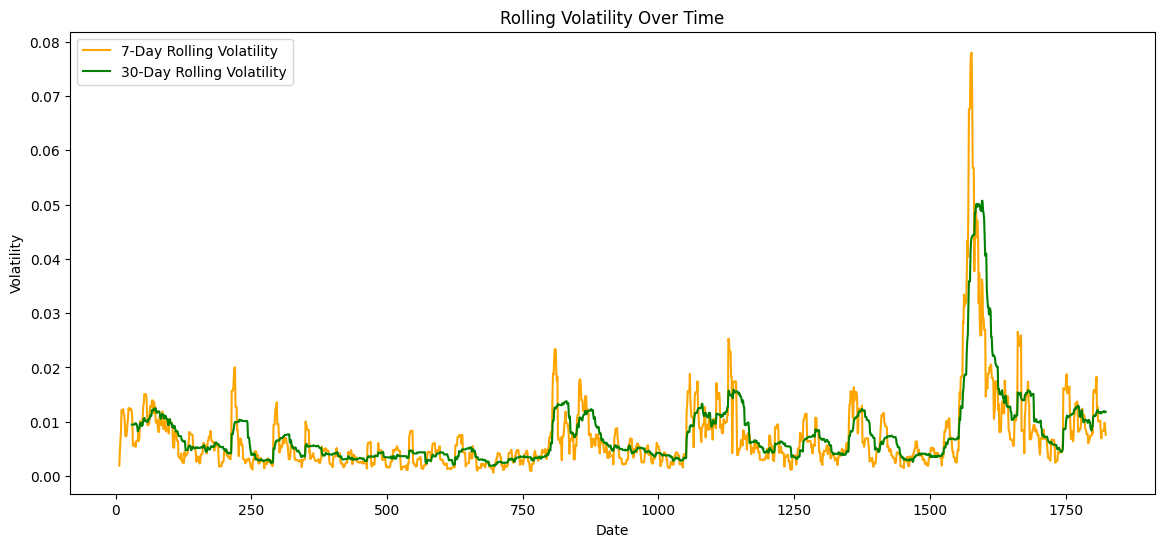

In [ ]:
# Plotting rolling volatility over time
plt.figure(figsize=(14, 6))
plt.plot(yahoo_stock_data.index, yahoo_stock_data['Rolling Volatility (7-Day)'], label='7-Day Rolling Volatility', color='orange')
plt.plot(yahoo_stock_data.index, yahoo_stock_data['Rolling Volatility (30-Day)'], label='30-Day Rolling Volatility', color='green')
plt.title('Rolling Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()



What is Rolling Volatility?

Volatility measures how much the stock price fluctuates over a given time frame. It’s a key metric of risk, with higher values indicating greater uncertainty and price swings.

Rolling Volatility is a moving measure of volatility over a specific window, such as 7 or 30 days, providing a dynamic view of how volatility changes over time.

Chart Components:
X-Axis (Date):

The x-axis represents the time period over which the volatility is measured. Each data point corresponds to the volatility at that point in time.
The timeline likely spans several years, though specific dates aren't labeled.
Y-Axis (Volatility):

The y-axis shows the magnitude of volatility as a numerical value. Larger values indicate more significant price fluctuations.
Two Lines (Rolling Volatility Windows):

7-Day Rolling Volatility (Orange Line):
Represents short-term volatility calculated over a 7-day window.
This line fluctuates more sharply, reflecting immediate changes in the market.
30-Day Rolling Volatility (Green Line):
Represents longer-term volatility calculated over a 30-day window.
This line is smoother because it averages volatility over a broader range, filtering out short-term noise.
Volatility Spikes:

Peaks in both lines represent periods of higher market uncertainty or rapid price changes.
Notable spikes are visible, especially toward the right of the chart, indicating events or periods with significant market activity (e.g., a financial crisis, policy changes, or major news).
Observations:
Short-Term vs. Long-Term Trends:

The 7-day rolling volatility captures more immediate, short-term changes in the market, which is why it reacts faster and displays more fluctuations.
The 30-day rolling volatility reflects longer-term trends, acting as a smoother indicator of sustained volatility.
Periods of High Volatility:

There are several distinct spikes where both 7-day and 30-day volatility increase significantly, suggesting periods of market turmoil or rapid price movement.
For example, the large peak near the end of the chart might correspond to a major financial event, such as a market crash.
Periods of Stability:

There are sections where both lines are relatively flat and low, indicating periods of market calm and low risk.
Lag Effect:

The 30-day volatility (green line) tends to lag slightly behind the 7-day volatility (orange line) during rapid spikes or dips. This happens because it uses a larger window for calculation, making it slower to react to immediate changes.
Why This Chart is Useful:
Risk Management: Investors can use this to monitor risk levels over time. High volatility indicates higher risk and potential for loss or gain.
Market Sentiment: Spikes in volatility often reflect fear or uncertainty in the market.
Decision Making: Short-term traders might focus on 7-day volatility for quick adjustments, while long-term investors consider 30-day trends for strategic decisions.


# Portfolio Risk Assessment: Value at Risk (VaR) and Expected Shortfall (ES)


In [ ]:
# Portfolio Risk Assessment:

In [ ]:
# Define the confidence level for risk metrics
confidence_level = 0.95


In [ ]:
# Calculate the Value at Risk (VaR) at the given confidence level
var_95 = yahoo_stock_data['Daily Return'].quantile(1 - confidence_level)

In [ ]:
# Calculate Expected Shortfall (ES) at the same confidence level
es_95 = yahoo_stock_data[yahoo_stock_data['Daily Return'] <= var_95]['Daily Return'].mean()


Portfolio Risk Assessment (Confidence Level: 95%):
Value at Risk (VaR 95%): -0.0134
Expected Shortfall (ES 95%): -0.0261


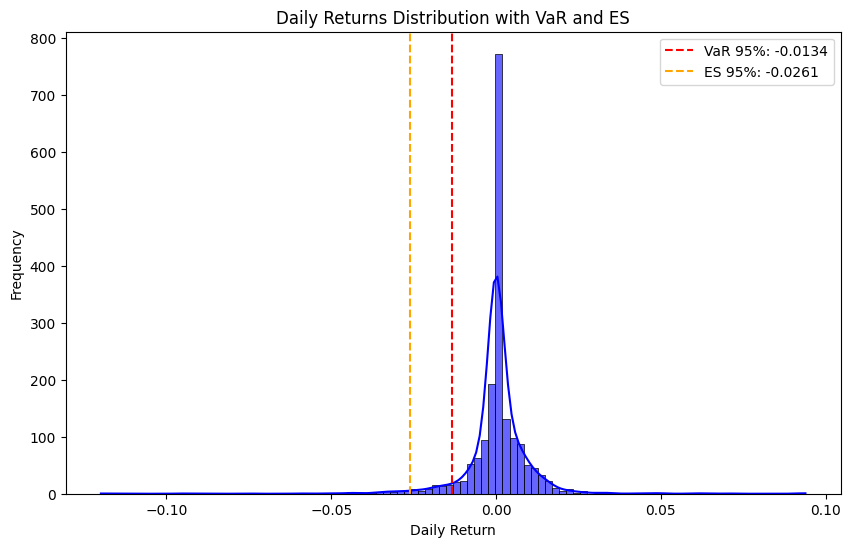

In [ ]:
# Displaying the results
print(f"Portfolio Risk Assessment (Confidence Level: {confidence_level * 100:.0f}%):")
print(f"Value at Risk (VaR 95%): {var_95:.4f}")
print(f"Expected Shortfall (ES 95%): {es_95:.4f}")

# Plotting the distribution of daily returns with VaR and ES
plt.figure(figsize=(10, 6))
sns.histplot(yahoo_stock_data['Daily Return'], bins=100, kde=True, color='blue', alpha=0.6)
plt.axvline(var_95, color='red', linestyle='--', label=f'VaR 95%: {var_95:.4f}')
plt.axvline(es_95, color='orange', linestyle='--', label=f'ES 95%: {es_95:.4f}')
plt.title('Daily Returns Distribution with VaR and ES')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Key Components of the Chart:
X-Axis (Daily Return):

Represents the range of daily return values (percentage changes in stock prices) on the dataset.
Values closer to 0 indicate small changes in stock prices, while values further to the left or right represent larger losses or gains, respectively.
Y-Axis (Frequency):

Indicates how often certain daily return values occur in the dataset.
Higher bars suggest that most returns are clustered near zero, showing that small daily changes are more common than large ones.
Histogram (Blue Bars):

Represents the frequency distribution of daily returns.
The shape of the histogram is close to a normal distribution (bell curve) but may have some skewness or heavier tails, common in financial return distributions.
Red Dashed Line (VaR at 95%):

Value at Risk (VaR) is a risk measure that estimates the maximum expected loss over a given time period at a specific confidence level (95% in this case).
The red dashed line marks the 95% VaR threshold, showing that 95% of the returns lie to the right of this line (less extreme losses), while 5% lie to the left (more extreme losses).
In this chart, the VaR value is approximately -0.0134, meaning the worst expected loss on 95% of trading days is around -1.34%.
Orange Dashed Line (ES at 95%):

Expected Shortfall (ES) (also known as Conditional VaR) is a risk measure that calculates the average loss beyond the VaR threshold.
It provides insight into the magnitude of extreme losses that fall within the tail of the distribution.
The orange dashed line marks the ES value of -0.0261, meaning that if losses exceed the VaR threshold, the average loss would be around -2.61%.
Symmetry and Tails:

The bulk of the distribution is centered around zero, showing that most daily returns are close to neutral.
The left tail (negative returns) and right tail (positive returns) indicate extreme losses or gains. The VaR and ES lines focus on the left tail (risk of losses).
Key Insights:
Risk Metrics (VaR and ES):

VaR gives a snapshot of the worst-case loss within normal conditions at a 95% confidence level.
ES complements VaR by quantifying the average loss in extreme cases, making it a more comprehensive risk measure.
Together, these metrics are used in risk management to evaluate potential losses and prepare for worst-case scenarios.
Distribution Characteristics:

The narrow peak around 0 shows that small returns (positive or negative) are the most frequent.
The left tail highlights the risk of significant losses, which are rarer but can have a significant impact on portfolio performance.
Practical Implications:

For a portfolio manager, this chart provides a quick overview of the stock’s return distribution and associated risks.
It shows that while extreme losses are rare, they are not negligible, and the ES metric helps quantify their potential impact.
Applications of the

Pridicted Modeling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define predictors (features) and target (Close price)
features = ['7-Day MA', '30-Day MA', '7-Day Volatility', '30-Day Volatility',
            'Daily Return', 'RSI', 'Bollinger_Mean', 'Bollinger_Upper', 'Bollinger_Lower']
target = 'Close'

In [ ]:
# Assuming these are the calculations you intend for the missing features:

# 30-Day Moving Average
yahoo_stock_data['30-Day MA'] = yahoo_stock_data['Close'].rolling(window=30).mean()

# 7-Day Volatility
yahoo_stock_data['7-Day Volatility'] = yahoo_stock_data['Daily Return'].rolling(window=7).std()

# 30-Day Volatility
yahoo_stock_data['30-Day Volatility'] = yahoo_stock_data['Daily Return'].rolling(window=30).std()

# Now, the dropna should work:
model_data = yahoo_stock_data.dropna(subset=features + [target])

In [ ]:
# Split data into predictors (X) and target (y)
X = model_data[features]
y = model_data[target]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)



In [ ]:
# Evaluate model performance
#rf_rmse = mean_squared_error(y_test, y_pred, squared=False) # Remove 'squared=False' as it's not supported in older versions
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE using NumPy's square root
rf_r2 = r2_score(y_test, y_pred)

Random Forest Model Performance:
Root Mean Squared Error (RMSE): 188.68
R-squared (R2): 0.53


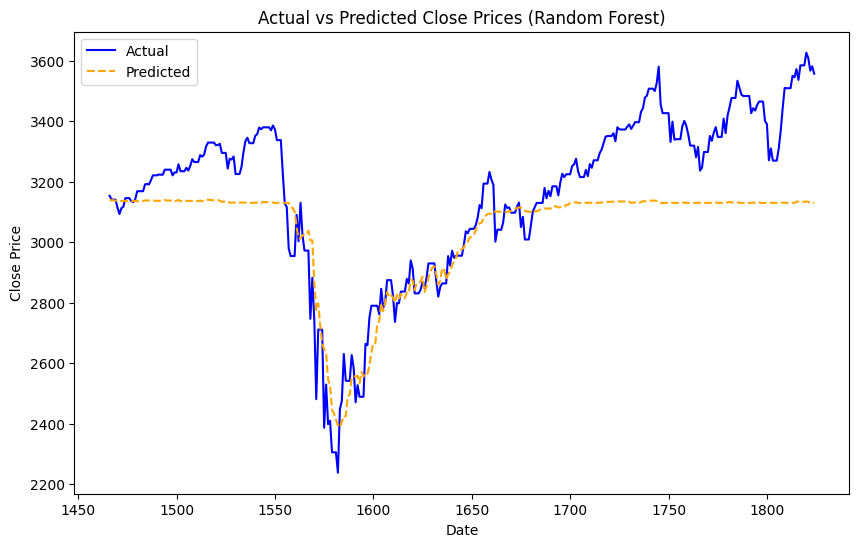

In [ ]:
# Display results
print(f"Random Forest Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R-squared (R2): {rf_r2:.2f}")

# Plot actual vs predicted Close prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='orange', linestyle='--')
plt.title('Actual vs Predicted Close Prices (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


This chart shows a comparison between actual closing prices and predicted closing prices for a stock using a Random Forest model. Here's a detailed breakdown:

Key Components:
X-Axis (Date):

Represents the time period over which the stock's closing prices were analyzed. The timeline begins at a later index (1450) and extends to approximately 1850, suggesting this is a subset of the entire dataset.
Y-Axis (Close Price):

Indicates the stock's closing price. Values range from about 2200 to 3600, reflecting the stock's price levels during the observed period.
Blue Line (Actual Closing Prices):

Represents the true closing prices of the stock as recorded historically.
This line fluctuates, showing real-world stock price movements, including upward trends, downward trends, and periods of volatility.
Orange Dashed Line (Predicted Closing Prices):

Represents the predicted closing prices as estimated by the Random Forest model.
The orange line is generally smoother than the actual prices and attempts to approximate the stock's movement over time.
Observations:

Trend Matching:

The predicted prices roughly follow the general trend of the actual prices, capturing major movements (e.g., declines, recoveries, and uptrends). This indicates that the model has successfully identified some patterns in the data.
Lag and Smoothing:

The predicted prices appear smoother than the actual prices. This is typical of machine learning models, as they often struggle to replicate daily fluctuations or noise in financial data.
The predicted line may lag slightly during sharp movements, such as the dramatic drop and recovery in the middle of the chart. This suggests the model is slower to react to sudden changes.

Major Drop and Recovery:

The chart features a significant decline in the actual prices (around the middle of the timeline), likely representing a market crash or correction. The model captures this decline but may underestimate the severity of the drop.
Periods of Underperformance:

After the recovery (mid-chart), the predicted line flattens out, deviating more from the actual prices, especially as the stock continues its upward trend. This suggests that the model struggles to capture long-term trends or upward momentum accurately.

Insights:

Model Strength:

The Random Forest model performs well in capturing overall trends and major movements in the stock price.
It’s effective in identifying periods of decline or stability but may struggle with sharp fluctuations or sustained uptrends.

Model Weakness:

Random Forest models can struggle with financial data due to its high volatility and noise. The smoother predicted line reflects the model’s limitation in capturing day-to-day variability.
Practical Applications:

